In [8]:
#The goal of this project is to determine which target variables influence how much a consumer spends on black friday

import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Import data, describe it 
data = pd.read_csv('BlackFriday.csv')
data.head()
data.describe()

#Column Names: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years,
#Marital_Status, Product_Category_1,Product_Category_2, Product_Category_3,Purchase
#Things to note: 
#     there are NaN values in Product_Category_2, and Product_Category_3
#     Marital Status: 0 is Male
#     City Category: can be converted to a numerical
#     Age: Are number ranges stored as strings
#     Gender: is recorded as binary
#     Stay_In_Current_City: Handle + symbol
#     Occupation: There are about 16 values







,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


<class 'pandas.core.frame.DataFrame'>


/Users/anoop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


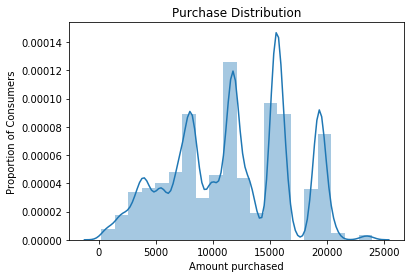

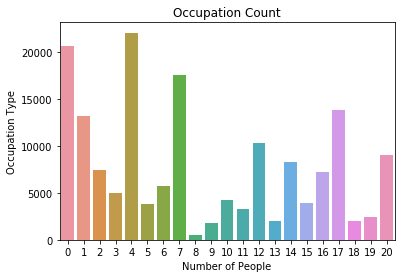

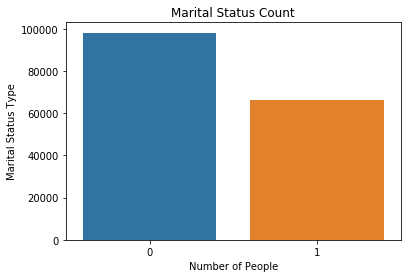

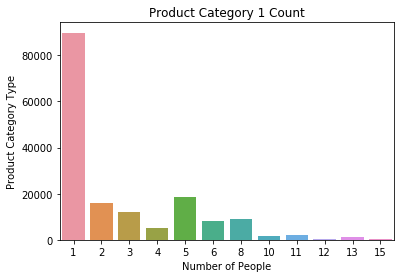

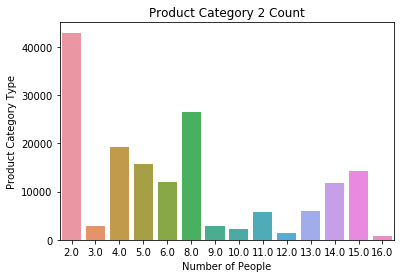

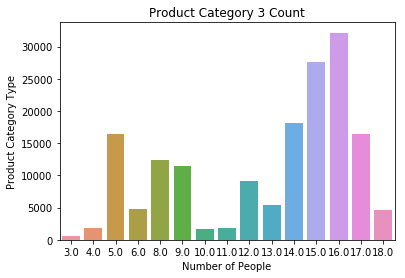

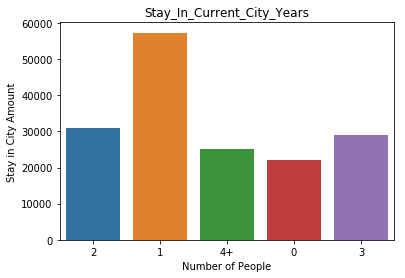

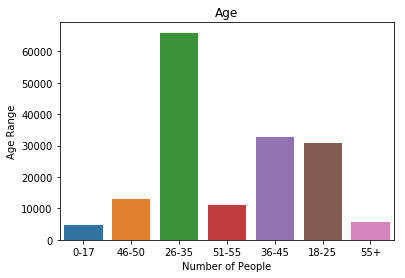

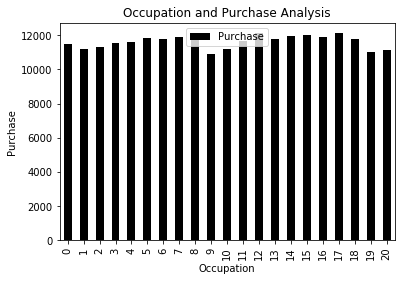

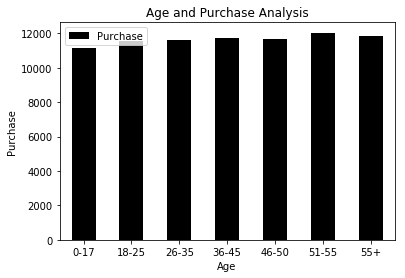

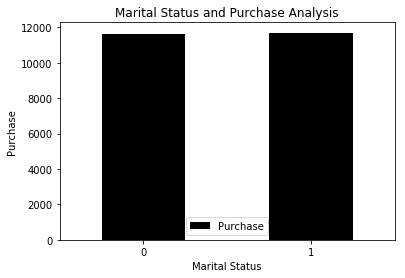

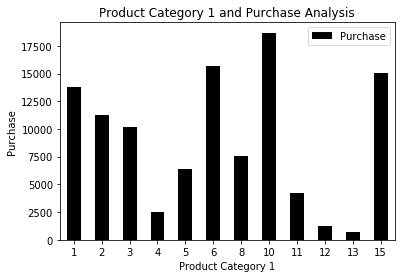

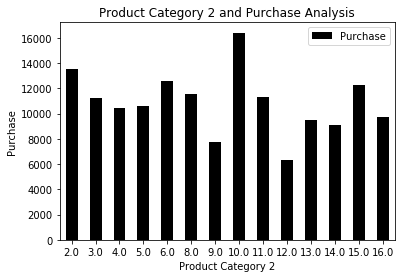

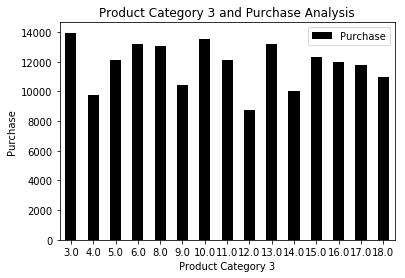

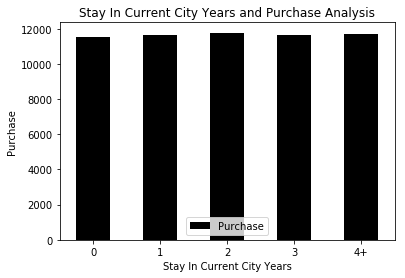

In [21]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

print(type(data))

#Data Visualization

#Purchase Distrubution
sns.distplot (data['Purchase'],bins = 20)
plt.xlabel('Amount purchased')
plt.ylabel('Proportion of Consumers')
plt.title('Purchase Distribution')
# plt.savefig('PurchaseDistribution.png')
plt.show()

#Occupation Distrubtion
sns.countplot(data['Occupation'])
plt.xlabel('Number of People')
plt.ylabel('Occupation Type')
plt.title('Occupation Count')
plt.savefig('OccupationDistribution.png')
plt.show()

#Marital Status Distrubtion

sns.countplot(data['Marital_Status'])
plt.xlabel('Number of People')
plt.ylabel('Marital Status Type')
plt.title('Marital Status Count')
plt.savefig('MSDist.png')
plt.show()

#Product Category 1 

sns.countplot(data['Product_Category_1'])
plt.xlabel('Number of People')
plt.ylabel('Product Category Type')
plt.title('Product Category 1 Count')
plt.savefig('PC1Dist.png')
plt.show()

#Product Category 2 

sns.countplot(data['Product_Category_2'])
plt.xlabel('Number of People')
plt.ylabel('Product Category Type')
plt.title('Product Category 2 Count')
plt.savefig('OccupationDistribution.png')
plt.savefig('PC2Dist.png')

plt.show()

#Product Category 3

sns.countplot(data['Product_Category_3'])
plt.xlabel('Number of People')
plt.ylabel('Product Category Type')
plt.title('Product Category 3 Count')
plt.savefig('PCDist3.png')
plt.show()

#Stay_In_Current_City_Years 
sns.countplot(data['Stay_In_Current_City_Years'])
plt.xlabel('Number of People')
plt.ylabel('Stay in City Amount')
plt.title('Stay_In_Current_City_Years')
plt.savefig('StayDist.png')
plt.show()

#Age 
sns.countplot(data['Age'])
plt.xlabel('Number of People')
plt.ylabel('Age Range')
plt.title('Age')
plt.savefig('AgeDist.png')
plt.show()

#Occupation by Purchase Amount
occMean = data.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
occMean.plot(kind='bar', color='black')
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('OccvP.png')
plt.show()

#Age by Purchase Amount
ageMean = data.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
ageMean.plot(kind='bar', color='black')
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('AgevP.png')
plt.show()


#Marital Status By Purchase Amount
MSMean = data.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
MSMean.plot(kind='bar', color='black')
plt.xlabel("Marital Status")
plt.ylabel("Purchase")
plt.title("Marital Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('MSVP.png')
plt.show()
#Notes: Despite disparity in male vs. females as seen in above visualization, gender doesn't seem to significantly
#affect Purchase amount on its own 

#Product Category 1 By Purchase Amount
PC1Mean = data.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
PC1Mean.plot(kind='bar', color='black')
plt.xlabel("Product Category 1")
plt.ylabel("Purchase")
plt.title("Product Category 1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('PC1VP.png')
plt.show()
#Notes: It seems like certain Product Categories seem to significantly affect the purchase amount

#Product Category 2 By Purchase Amount
PC1Mean = data.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
PC1Mean.plot(kind='bar', color='black')
plt.xlabel("Product Category 2")
plt.ylabel("Purchase")
plt.title("Product Category 2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('PC2VP.png')
plt.show()

#Notes: It seems like certain Product Categories seem to significantly affect the purchase amount
# but not as much with product category 1

#Product Category 3 By Purchase Amount
PC1Mean = data.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
PC1Mean.plot(kind='bar', color='black')
plt.xlabel("Product Category 3")
plt.ylabel("Purchase")
plt.title("Product Category 3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('PC3vP.png')
plt.show()
#Notes: It seems like certain Product Categories seem to significantly affect the purchase amount
# but not as much with product category 1 or 2

#Stay In Current City Years By Purchase
SICMean = data.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
SICMean.plot(kind='bar', color='black')
plt.xlabel("Stay In Current City Years")
plt.ylabel("Purchase")
plt.title("Stay In Current City Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.savefig('SICvP.png')
plt.show()


#Final Notes: It seems like Product Categories 1, 2, and 3 only seem to significantly be able to predict 
# the purchasing amount. Possibly using a regression model of some sort with these features could create an 
# accurate predictive model. 



/Users/anoop/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


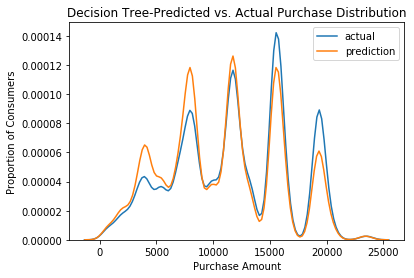

In [22]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


#Machine Learning Model 
data = data.dropna(axis = 0)
X = data.drop(['Purchase','User_ID','Product_ID'], axis = 1)
Y = data['Purchase']

le = LabelEncoder()
X['Stay_In_Current_City_Years'] = le.fit_transform(X['Stay_In_Current_City_Years'])
X['City_Category'] = le.fit_transform(X['City_Category'])
X['Age'] = le.fit_transform(X['Age'])
X['Gender'] = le.fit_transform(X['Gender'])

X_Train, X_Test, Y_Train,Y_Test = model_selection.train_test_split(X,Y,train_size = 0.2,random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_Train,Y_Train)
sns.distplot(Y_Test,bins = 20, hist = False, label = 'actual')
sns.distplot(model.predict(X_Test),bins = 20, hist = False, label = 'prediction')
plt.xlabel('Purchase Amount')
plt.ylabel('Proportion of Consumers')
plt.title('Decision Tree-Predicted vs. Actual Purchase Distribution')
plt.savefig('Predictedvactual.png')
plt.show()

# model = LinearRegression()
# model.fit(data[['Product_Category_1']],data[['Purchase']])
# sns.distplot(Y_Test,bins = 20, hist = False, label = 'actual')
# sns.distplot(model.predict(X_Test),bins = 20, hist = False, label = 'prediction')
# plt.xlabel('Purchase Amount')
# plt.ylabel('Proportion of Consumers')
# plt.title('LR-Predicted vs. Actual Purchase Distribution')
# plt.show()

